# <center> CITS5508 Lab sheet 4 </center>
**Name:** Varun Jain <br>
**Student Number:** 21963986 <br>
**Date Due:** 23rd April 2021 <br>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Project 1 - Abalone Dataset

## Task 1 - Data Loading, Visualisation, and Cleaning

### Data Loading

In [2]:
abalone_data = pd.read_csv('abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight",
                                                 "Viscera weight", "Shell weight", "Rings"])
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Exploratory Analysis

In [3]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


The dataset has 4177 obervations recorded with **Sex** is an object datatype, **Rings** an INT, and the rest of the attributes are float64.

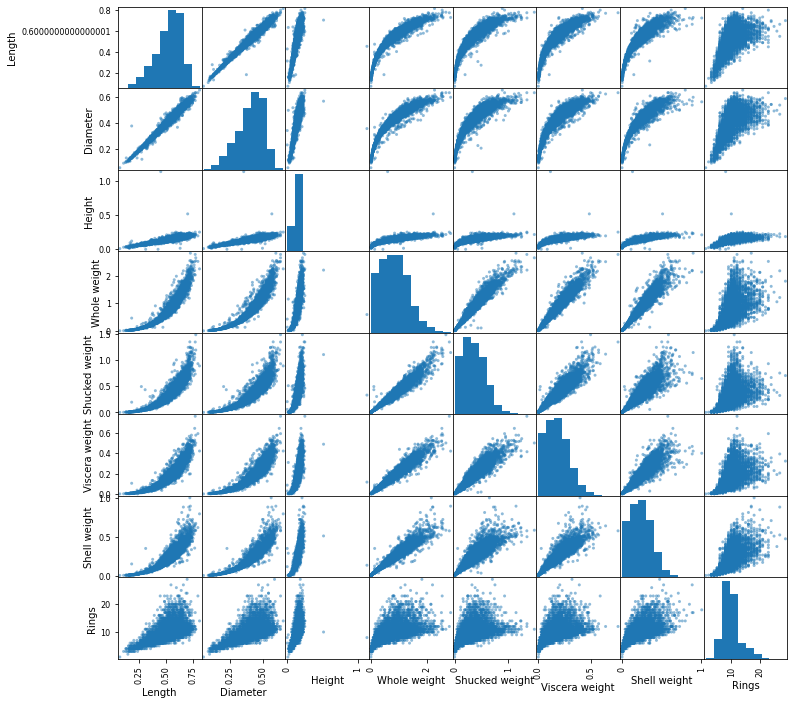

In [4]:
scatter_matrix(abalone_data, figsize=(12,12));

As we can observe in the scatter plot above, most attributes seem to be highly correlated in a linear positive direction. For instance, the **length** and **diameter**, and **whole weight** with **shucked weight**, **viscera weight** and **shell** are positvely correlated with one another. 

Highly correlated attributes do not have much impact on the prediction model as it does not provide any additional information and can prove to be quite redundant, as it will not contribute significantly to improve the models performance. In thid case, we will remove the following attributes: **length** and **whole weight**. From observation, **whole weight** is strongly correlated to all three of the other weight attributes whereas the other weight attributes seem to be moderatly correlated with one another. 

### Data Cleaning

As stated above, remove the **Length** and **Whole Weight** attribute.

In [5]:
abalone_data = abalone_data.drop(['Length', 'Whole weight'], axis = 1).reset_index(drop=True)

In [6]:
abalone_data.head()

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.365,0.095,0.2245,0.1010,0.150,15
1,M,0.265,0.090,0.0995,0.0485,0.070,7
2,F,0.420,0.135,0.2565,0.1415,0.210,9
3,M,0.365,0.125,0.2155,0.1140,0.155,10
4,I,0.255,0.080,0.0895,0.0395,0.055,7


### Data Transformation - One Hot Encoding

Rename the **M** and **F** values in the **Sex** attribute to **A**, then apply one hot encoding to convert the column into numerical columns

In [7]:
abalone_data['Sex'] = abalone_data['Sex'].replace(['M','F'], ['A', 'A'])
#looking at learning rate

In [8]:
abalone_data = pd.concat([abalone_data,pd.get_dummies(abalone_data['Sex'], prefix='Sex')],axis=1)
abalone_data.drop(['Sex'],axis=1, inplace=True)

In [9]:
abalone_data.head()

,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings,Sex_A,Sex_I
0,0.365,0.095,0.2245,0.1010,0.150,15,1,0
1,0.265,0.090,0.0995,0.0485,0.070,7,1,0
2,0.420,0.135,0.2565,0.1415,0.210,9,1,0
3,0.365,0.125,0.2155,0.1140,0.155,10,1,0
4,0.255,0.080,0.0895,0.0395,0.055,7,0,1


## Task 2 - Training and Predication

### Dependent and Indepedent Data

Seperate the target and response attributes. The Target Variable contains the target attribute **Rings** and the predicators and the remaining numerical attributes that will be mappeed tot he target variable. 

In [10]:
X_abalone = abalone_data.drop("Rings", axis=1)
y_abalone = abalone_data["Rings"].copy()

### Train Test Split

Split the dataset into a training and testing set. 15% of the data should be allocated the the test set and the remaining 85% is allocated to the training set. There is 3550 observations recored for the training set.  

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_abalone, y_abalone, test_size=0.15, random_state=42)

In [12]:
x_train.shape

(3550, 7)

### Support Vector Regressor

For training the model, the Support Vector Regressor Model will be used to find the optimal hyperparameters. Theses estimators then will be utilised by the SVR in the AdaBoost Algorithm. To shorten the marking time, the GridSearchCV code has been commented out. 

The following hyperparameters are chosen to be tested against each other to find the optimal estimators for the regressor model to be passed to the AdaBoost Algorithm. The Support Vector Regressor Hyperparameters are:
- **random_state = 42:** ensures that similar random instances are selected to ensure accurate results. 
- **Kernal:** refers to the type of kernal used. This includes rbf, linear, poly, and sigmoid. 
- **C:** is a Regularization parameter. C represents an error term which shows the tradeoff between the decision boundary and misclassification term. 
- **Gamma:** only used for the rbf kernal. Gamma impacts the curvature of the decision boundary. 


In [13]:
'''
looking at learning rate
params_svr =  {'kernel': ['rbf','poly','sigmoid'], 
              'C': [1, 5, 10],  
              'gamma': ['scale', 'auto', 1]} 

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, params_svr, verbose=2) 
grid_search.fit(x_train, y_train)
'''

"\nlooking at learning rate\nparams_svr =  {'kernel': ['rbf','poly','sigmoid'], \n              'C': [1, 5, 10],  \n              'gamma': ['scale', 'auto', 1]} \n\nsvm_reg = SVR()\ngrid_search = GridSearchCV(svm_reg, params_svr, verbose=2) \ngrid_search.fit(x_train, y_train)\n"

In [14]:
'''
prints the best parameters 
grid_search.best_params_
'''

'\nprints the best parameters \ngrid_search.best_params_\n'

From the gridSearchSearch Analysis, the best hyperparameters the GridSearchCV produced: **{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}**.

### AdaBoost Regressor

For the AdaBoost Regressor, the Support Vector Regressor with an RBF Kernal is used as the base estimator. The maximum number of estimators utilised in the AdaBoostRegressor is five. The AdaBoostRegressor tries to improve the performance of the decision tree by continously adjusting the weights of the misclassified attributes after each iteration. 

#### Train

For this instance, we will be passing the default values through the SVR. There were some noticeable changes in the MAE values, as for when the hyperparameter **C=10** was passed through the regressor, the model seemed to perform worse. The MAE values seemed to be getting larger after each estimator, which did not seem right.  

In [15]:
base_estimator = SVR(kernel ="rbf")

In [16]:
#5 estimators are used for the adaboost regressor
adaboostregressor_clf = AdaBoostRegressor(base_estimator,random_state=42, n_estimators = 5)

In [17]:
adaboostregressor_clf.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=SVR(), n_estimators=5, random_state=42)

#### Predication

In [18]:
X_test_predict_value = adaboostregressor_clf.predict(x_test)
X_trained_predict_value = adaboostregressor_clf.predict(x_train)

In [19]:
#np.around coverts the predication values into integors.  
X_trained_predict = np.around(X_trained_predict_value).astype('int64')
X_test_predict = np.around(X_test_predict_value).astype('int64')

#### Mean Absolute Error

The stage_predict() is a generator method, which returns staged predictions. So after each iteration, staged predict computes the ensemble predication which then is passed through the mean_absolute_error() to compute the MAE for each ensemble predication. The Regressor will predict the output from the intermediate nodes and then calculate the MAE values for each intermediate nodes for both the training and test set. Since the number of estimators used in this code is five, there will be five MAE values for each set where the first MAE is calculated using the base weights, and the 5th iteration MAE with modified weights. The regressor will predict the output

In [20]:
#calculates the mean absolute error for each stage predication. 

def mae_for_intermediate_steps(y_train, train_test_set):  
    stage_predict_lst = []
    for intermediate_stage_predications in adaboostregressor_clf.staged_predict(train_test_set):
        #calculates the MAE for each staged predication, will round and covert the datatype to an int. 
        round_prediction = np.around(intermediate_stage_predications).astype('int64')
        #calculate the mae value for each prediction then appends that value to a list. 
        mae_for_each_intermediate_step=mean_absolute_error(y_train, round_prediction)
        stage_predict_lst.append(mae_for_each_intermediate_step)
    return stage_predict_lst

In [21]:
x_train_staged_predications = mae_for_intermediate_steps(y_train,x_train)
x_test_staged_predications = mae_for_intermediate_steps(y_test, x_test)

In [22]:
#returns a list of MAE for each estimator. In total 5 MAE for both training and testing set will print starting with index of 0.
mae_list = pd.DataFrame(
    {
        'MAE Training Set':x_train_staged_predications,
        'MAE Testing Set':x_test_staged_predications
    }
)
mae_list

,MAE Training Set,MAE Testing Set
0,1.503662,1.537480
1,1.503662,1.537480
2,1.497746,1.499203
3,1.497746,1.499203
4,1.494085,1.499203


## Task 3 - Results and Plots

#### MAE Plot Comparsion

In [23]:
#Plots the MAE values for each estimtor. The 0th value on the x-axis is the first estimator computed by the model
#and the 4th value is the 5th estimator. 

def plot_comparsion_for_mae_values(mae_train, mae_test):
    x=[0,1,2,3,4]
    plt.scatter(x, mae_train)
    plt.scatter(x, mae_test)
    plt.plot(x, mae_train, label="Adaboost Train")
    plt.plot(x, mae_test, label="Adaboost Test")
    plt.legend(prop={'size': 8.2})
    plt.xlabel("Iteration")
    plt.ylabel("MAE")
    plt.show()

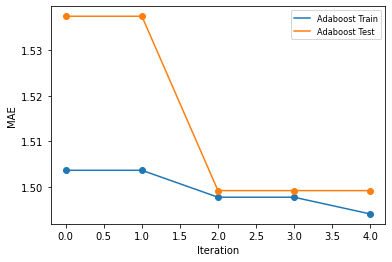

In [24]:
plot_comparsion_for_mae_values(x_train_staged_predications, x_test_staged_predications)

- The Mean Absolute Error decreases for the Training set after each successive estimator. 
- The highest estimator for both the training and testing set is the first estimator starting at 0, with the lowest estimator being the 4th estimator. 
- The MAE values for the training set to have a significant drop after the first estimator to the second estimator. 
- The MAE values for the testing set has a more gradual decrease but at different staged. There is no effect in the MAE values from the first to second estimator, and second and third estimator. 
- The training set performs better than the test set as it has a lower MAE values. 

#### Performance Comparsion

In [25]:
#plots the groundtruth against the predicated values for both the test and training set. 
#the Ground truth is plotted along the x-axis and the predicated values is ploted against the y-axis. 
#the 45 degree linear line represents the actual values for both the test and training set 

def performance(X_trained_predict, X_test_predict, y_train, y_test):
    fig, ax1 = plt.subplots(1, 2, figsize=(15,5))
    #plot number 1 - training set
    ax1[0].scatter(y_train, X_trained_predict, alpha=0.1 )
    ax1[0].plot(y_train, y_train, "orange");
    ax1[0].set_xlabel('Actual value')
    ax1[0].set_ylabel('Predicted value')
    ax1[0].set_title('Training Set Predication Performance')
    #plot number 2 - test set. 
    ax1[1].scatter(y_test, X_test_predict, alpha=0.1 )
    ax1[1].plot(y_test, y_test,"orange");
    ax1[1].set_xlabel('Actual value')
    ax1[1].set_ylabel('Predicted value')
    ax1[1].set_title('Testing Set Predication Performance')
    

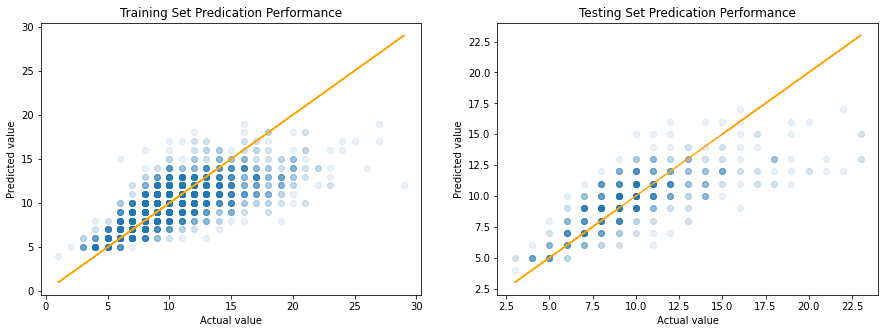

In [26]:
performance(X_trained_predict, X_test_predict, y_train, y_test)

- Relatively difficult to estimate whether the training modeling is over/under estimating the testing model as the features on the scale seem to be similarly distributed across both plots. 
- The training predication set seems to have a greater spread and more dense points than the testing set. This simply could be due to the training dataset containing 85% of the original dataset. 
- The two predication performance plots above represent the relationship between the ground truth and predicated values of the ring attribute. The 45 degree line represnts the actual values that was observed. 
- the alpha value is set to 0.1, changing the opacity of the points in the graphs based on the the total number of times a certin point for a particular actual and predicated point appeared. The light blue represents lower freency of a certain point, the darker the point, the more pairs of a particular value are present for a certain actual and predicated pair values. 

#### Raw Error

In [27]:
#computes the raw error by subtracting the predicated values from the actual values. 
#plots the raw test and training values in seperate histogram plots labelling the number of instances the regressor
#underestimates or overestimates the ring values. 

def raw_error_histogram(X_trained_predict,X_test_predict, y_train, y_test):
    #Raw error value computation for the training and test set. 
    raw_error_train = X_trained_predict - y_train
    raw_error_test = X_test_predict - y_test
    
    fig, ax1 = plt.subplots(1, 2, figsize=(15,5))
    #Raw error values for the training set
    ax1[0].hist(raw_error_train, bins = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
    ax1[0].set_title('Raw Error For Training Set')
    ax1[0].set_xlabel('Raw Error')
    ax1[0].set_ylabel('Count')
    #Raw error values for the test set 
    ax1[1].hist(raw_error_test,bins = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
    ax1[1].set_title('Raw Error For Test Set')
    ax1[1].set_xlabel('Raw Error')
    ax1[1].set_ylabel('Count')

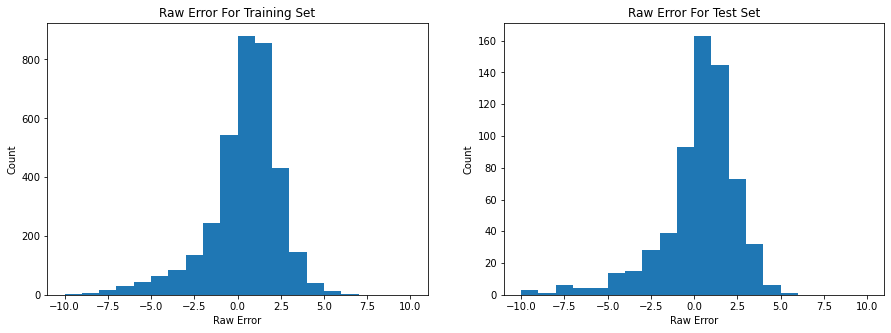

In [28]:
raw_error_histogram(X_trained_predict,X_test_predict, y_train, y_test)

Given the two plots above, the plot represents how well the regressor tends to estimate the ring value and by how much. 
- The Regressor model underestimates the ring value if the error value is negative. 
- The Regressor Model overestimates the ring value if the error value is positive. 

From observing the histogram plot, we see: 
- The Regressor Model correctly predicts the Rings approx 830 times in the training set. 
    - The RF regressor overtimated the number of rings by 1 for approx. 810 times, 
    - The RF Regressor underestimated the number of rings by 1 appox. 550 times.  
    - The error -2 should have a frequency appox. close to 220. 
    - The error +2 should have a frequency appox. close to 400. 

- The Regressor Model correctly predicts the RIngs approx. 160 times in the Test Set. 
    - The RF regressor overtimated the number of rings by 1 for approx. 140 times.
    - The RF regressor underestimated the number of rings by 1 appox. 90 times. 
    - The error -2 should have a frequency appox. close to 40. 
    - The error +2 should have a frequency appox. close to 75. 

Relatively, the two models have a fairly similar distribution but different set of scales due to the number of observations in the dataset. The Adaboost Regressor does not perform too well, as the model wrongly predicts values up to 10/-10 for the ring value. It easily under and over estimates the values.

## Task 4 - Comparsion and Summary

### Relative Error

In [29]:
np.average(np.abs(X_trained_predict-y_train)/np.maximum(np.abs(y_train),0.00001))*100


14.78964825499

In [30]:
np.average(np.abs(X_test_predict-y_test)/np.maximum(np.abs(y_test),0.00001))*100

14.626277871491252

The Relative Error for the training set is 14.79% and the testing set is 14.63%.

### Conclusion

Overall, the regressor model has perform relatively well however for further improvements, we would need to further generalise the model. The MAE values decreased after each stage predication, and according to the MAE values the training dataset seems to perform better than the test set as it has a lower MAE value. 

# Project 2 - Wine Quality

## Task 1 - Data Loading and Visualisation

### Data Loading

In [31]:
wine_data = pd.read_csv('winequality-red.csv', delimiter = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Analysis

In [32]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


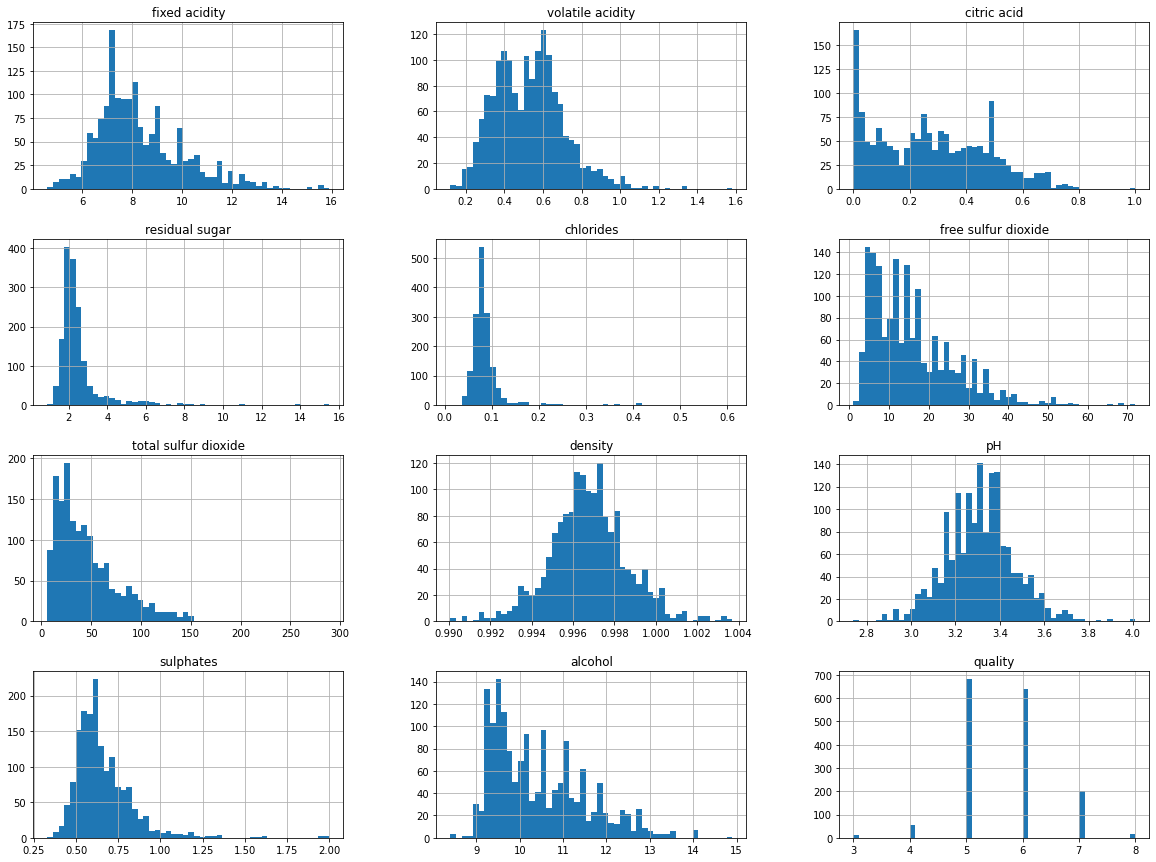

In [33]:
plt.ioff()
wine_data.hist(bins=50, figsize=(20,15))
plt.show();

From the histogram above, we can observe that most of these attributes are relatively distributed evenly across the plane, except **residual sugar**, **total sulfur dioxide** and **free sulfur dioxide**. The target for our predication model is **quality**, so from the quality plot, we can notices that there are only 6 int values. 

### Dependent and Indepedent Data

Seperate the target and response attributes. The Target Variable contains the target attribute **Quality** and the remaining numerical attributes are the response/independent variables. 

In [34]:
x_wine_data = wine_data.drop("quality", axis=1)
y_wine_data = wine_data["quality"].copy()

### Train Test Split

Split the dataset into a training and testing set. 15% of the data should be allocated the the test set and the remaining 85% is allocated to the training set. There is 1359 observations recored for the training set. 

In [35]:
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine_data, y_wine_data, test_size=0.15, random_state=42)

In [36]:
x_train_wine.shape

(1359, 11)

### Feature Scaling

Since Random Forest is an ensemble of decision tree, a tree based model...it does not require feature scaling as the data is not sensitive to the variance in the data. 

## Task 2 - RF Regressor on Full Dimensional Data

### Random Forest Regressor

For the Random Forest Regressor, the following hyperparameters were trained with the Random Forest Regressor with the GridSearchCV to find the optimal hyperparameters that would avoid overfitting the training data. To increase the marking speed, i have commented out any and all code regarding the gridsearcv. 

Hyperparameters:  
- **n_estimators:** the number of trees in the forest.  
- **max_depth:** the max depth of the trees 
- **min_samples_leafs:** the min number of samples needed for each leaf. 

#### Hyperparameters Tuning

In [37]:
'''
The Values that will be passed to the GridSearchCV. 

params_randomForest = {
    'n_estimators': [5,15,50],
    'min_samples_split': [2,7,15],
    "max_features": ["auto", "sqrt", "log2"]
}
'''

'\nThe Values that will be passed to the GridSearchCV. \n\nparams_randomForest = {\n    \'n_estimators\': [5,15,50],\n    \'min_samples_split\': [2,7,15],\n    "max_features": ["auto", "sqrt", "log2"]\n}\n'

#### GridSearch

In [38]:
'''
Performs the gridseachCV with the paramters stated above, and returns the best parameters that produce the optimal values. 

def gridSearch(params_randomForest, x_train, y_train):
    randomForest_clf = RandomForestRegressor(random_state=42)
    grid_search_RF = GridSearchCV(randomForest_clf, params_randomForest)
    grid_search_RF.fit(x_train, y_train)
    grid_search_RF.best_params_
    return grid_search_RF.best_params_
'''

'\nPerforms the gridseachCV with the paramters stated above, and returns the best parameters that produce the optimal values. \n\ndef gridSearch(params_randomForest, x_train, y_train):\n    randomForest_clf = RandomForestRegressor(random_state=42)\n    grid_search_RF = GridSearchCV(randomForest_clf, params_randomForest)\n    grid_search_RF.fit(x_train, y_train)\n    grid_search_RF.best_params_\n    return grid_search_RF.best_params_\n'

In [39]:
'''
Returns the list of best parameters. 

gridSearch(params_randomForest, x_train_wine, y_train_wine)
'''

'\nReturns the list of best parameters. \n\ngridSearch(params_randomForest, x_train_wine, y_train_wine)\n'

The optimal hyperparameters for the Random Forest Regressor are the following: **{'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 50}**

#### Mean Absolute Error

In [40]:
#The model will perform the Random Forest Regressor with the best estimator values found by the grid searchCV. 
#The function will then train the model, and predict the values for both the training and test set. 
#Once the predication values are found, the MAE will be computed for both sets. 

def mae(x_train,y_train, x_test, y_test):
    #Random Forest Regressor 
    RF_best_estimators=RandomForestRegressor(random_state=42, max_features="auto", min_samples_split = 2, n_estimators=50 )
    #Train the Model 
    RF_best_estimators=RF_best_estimators.fit(x_train,y_train)
    #Predict the model with training and test set, rounded and coverted to type int. 
    RF_train=np.around(RF_best_estimators.predict(x_train)).astype('int64')
    RF_test=np.around(RF_best_estimators.predict(x_test)).astype('int64')
    #The MAE values for traing and test set
    mae_train=mean_absolute_error(y_train, RF_train)
    mae_test=mean_absolute_error(y_test, RF_test)
    return RF_best_estimators, RF_train, RF_test, mae_train, mae_test

In [41]:
#Returns the fit model, train prediction, test predication and finally the MAE values for both the training and test dataset. 

RF_best_estimators, RF_train_predict, RF_test_predict, mae_train, mae_test = \
    mae(x_train_wine,y_train_wine, x_test_wine, y_test_wine)

In [42]:
#places the MAE of the Training and Test set in a dataFrame

mae_data = {"MAE Training": [mae_train], "MAE Testing": [mae_test]}
mae_df = pd.DataFrame(mae_data)
mae_df

,MAE Training,MAE Testing
0,0.043414,0.383333


The training MAE is relatively much lower than the MAE for the testing set. A low MAE value for the training set means that the regresssor model more accuretly defines the quality of the wine than the testing set. 

Since the difference betwwen the MAE training and the MAE testing is so large (nearly by a factor of 9), we can assume that the model is overftiing on the testing data. There is no way to further improve the model without any further generalising. 

#### Raw Error

In [43]:
#computes the raw error by subtracting the predicated values from the actual values. 
#plots the raw test and training values in seperate histogram plots labelling the number of instances the regressor
#underestimates or overestimates the quality values. 

def raw_error_histogram_smaller_bins(X_trained_predict,X_test_predict, y_train, y_test):
    
    raw_error_train = X_trained_predict - y_train
    raw_error_test = X_test_predict - y_test
    #Training Set
    fig, ax1 = plt.subplots(1, 2, figsize=(15,5))
    ax1[0].hist(raw_error_train, bins=[-3,-2,-1,0,1,2,3])
    ax1[0].set_title('Raw Error For Training Set')
    ax1[0].set_xlabel('Raw Error')
    ax1[0].set_ylabel('Count')
    #Test Set
    ax1[1].hist(raw_error_test, bins=[-3,-2,-1,0,1,2,3])
    ax1[1].set_title('Raw Error For Test Set')
    ax1[1].set_xlabel('Raw Error')
    ax1[1].set_ylabel('Count')

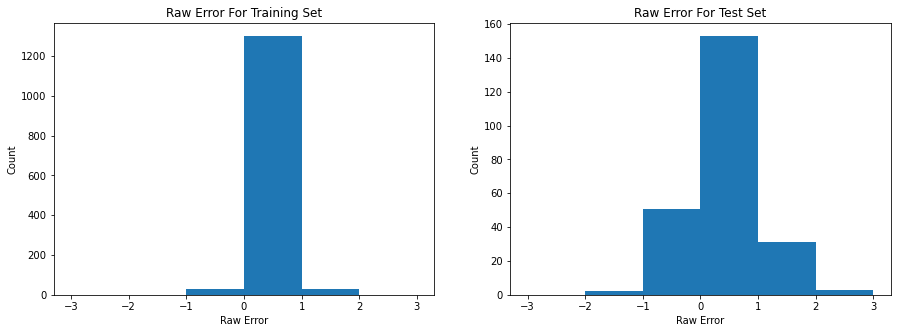

In [44]:
raw_error_histogram_smaller_bins(RF_train_predict, RF_test_predict, y_train_wine, y_test_wine)

Given the two plots above, the plot represents how well the regressor tends to estimate the ring value and by how much. 
- The Regressor model underestimates the ring value if the error value is negative. 
- The Regressor Model overestimates the ring value if the error value is positive. 

From observing the histogram plot, we see: 
- The Regressor Model correctly predicts the Quantity approx. 1300 times in the training set. 
    - The Random Forest performs fairly well as there is only a very small amount of underestimators and overestimators. 
- The Regressor Model correctly predicts the Quantity approx. 150 times in the testing set. 
    - The RF regressor overtimated the number of rings by 1 for approx. 58 times.
    - The RF regressor underestimated the number of rings by 1 appox. 38 times. 
    - The error 2 or -2 instances are relatively much smalled compared to the -1 or 1 error. 

## Task 3 - Feature Importance and Dimension Reduction

In [45]:
#reference from: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feature={}
#returns the attributes name and its corresponding importance value
for name,score in zip(x_train_wine,RF_best_estimators.feature_importances_):
    feature[name] = score
feature_importances = pd.DataFrame.from_dict(feature, orient='index').rename(columns={0: 'Importance'})
feature_importances= feature_importances.sort_values(by='Importance')
feature_importances

,Importance
free sulfur dioxide,0.045391
citric acid,0.051157
density,0.054544
pH,0.055878
fixed acidity,0.056086
residual sugar,0.058359
chlorides,0.063769
total sulfur dioxide,0.077540
volatile acidity,0.112592
sulphates,0.150940


**free sulfur dioxide** seems to have the lowest importance value with 4.539% and the **alcohol** has the importance value with 27.374%

In [46]:
#remove all the attributes that has a feature attribute less then 5%
feature_importances = feature_importances[~((feature_importances.Importance < 0.05))]
#the total feature importance value retained after the dimension step
feature = feature_importances.agg('sum')*100
print(f'The Total Feature Importance Value is {feature} after dimension reduction')

The Total Feature Importance Value is Importance    95.460891
dtype: float64 after dimension reduction


In [47]:
#drops the free sulfur dioxide attribute from the training and test dataset - dimension reduction

x_train_feature_selection = x_train_wine.drop(columns=['free sulfur dioxide'])
x_test_feature_selection = x_test_wine.drop(columns=['free sulfur dioxide'])

The only feature that was removed is the **free sulfur dioxide** attribute as it had an importance value less than 5%, and the rest remain as it is. 

## Task 4 - RF Regressor on Reduced Dimensional Data 

In [48]:
#utilise the MAE function to return the fit model, train prediction, test predication and finally the MAE values 
#for both the training and test dataset. 

RF_best_estimators_FS, RF_train_predict_FS, RF_test_predict_FS, MAE_train_FS, MAE_test_FS  = \
    mae(x_train_feature_selection,y_train_wine, x_test_feature_selection, y_test_wine)

In [49]:
#Places the MAE values for the training and testing datatset foe the reduced attributes. 

mae_data_reduced = {"MAE Training": [MAE_train_FS], "MAE Testing": [MAE_test_FS]}
mae_reduced_df = pd.DataFrame(mae_data_reduced)
mae_reduced_df

,MAE Training,MAE Testing
0,0.044886,0.3875


Remove the attributes makes the performance slightly worse. This may be due to the loss of data, however it is still within a reasonable range compared with the full dimensional data of MAE values. The MAE value is lower for the Training set meaning it predicts the **quality** relatively well, and performs much better than the testing dataset.


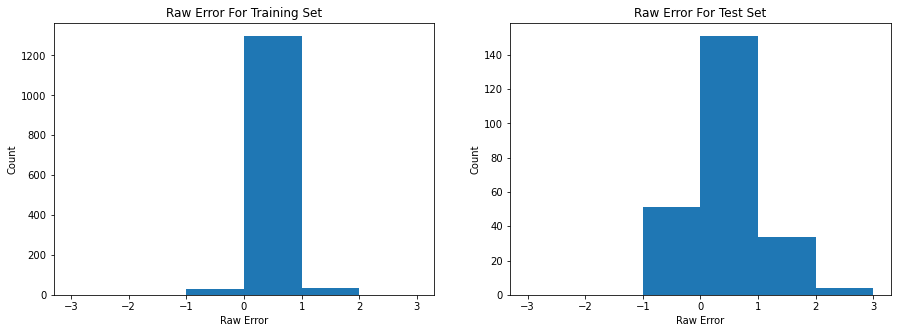

In [50]:
#computes the raw error histogram

raw_error_histogram_smaller_bins(RF_train_predict_FS, RF_test_predict_FS, y_train_wine, y_test_wine)

The Raw Errors for the Reduced Data is fairly similar to the Full Data. 
From observing the histogram plot, we see: 
- The Regressor Model correctly predicts the Quantity approx. 1300 times in the training set. 
    - The Random Forest performs fairly well as there is only a very small amount of underestimators and overestimators. 
- The Regressor Model correctly predicts the Quantity approx. 150 times in the testing set. 
    - The RF regressor overtimated the number of rings by 1 for approx. 58 times.
    - The RF regressor underestimated the number of rings by 1 appox. 38 times. 
    - There is no error for -2 but has a low number of instances for 2 error. 

## Task 5 - Comparsion and Conclusion

Overall, the performance on the full data and the reduced data is fairly similar. There is no significant improvement on the performance of the two models but infact, the MAE values for the training and testing data set seem to get worse for the reduced-dimensional data but by an insignificant amount. Overall, for both models the training set seems to perform much better than the testing dataset. Therefore, the model for the testing set is subjected to overfitting. 

The Raw Errors for the training set for the two regresors seem to perform really well as there is a high number of instances that has been correctly predicted, and a very small amount of instances that are predicted as overestimated/underestimated. 

The Raw Errors for the testing set for the two regressors seem to perform poorly. The distribution of errors, and the number of instances for each error value is relatively similar for the full and reduced dimensional data. 


Therefore, the model is subjected to overfitting, and there is no significant improvement for reduced dimensional data. 